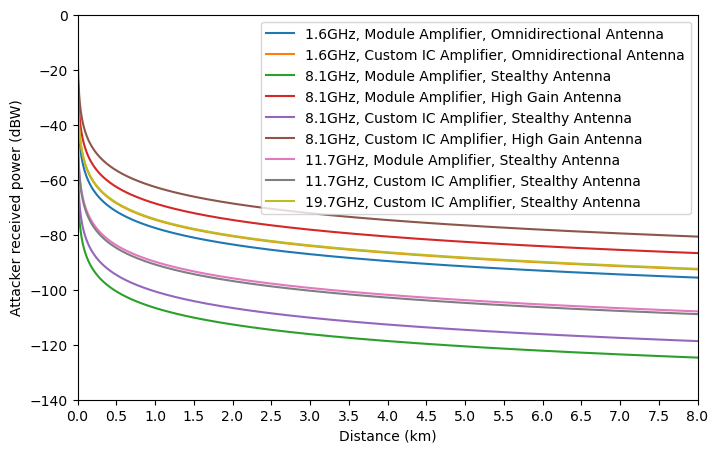

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def fspl(d_m, f_MHz):
    return -1 * (20 * np.log10(d_m) + 20 * np.log10(f_MHz) -27.55)

# equipment table -

equipment = {
    "1.6GHz, Module Amplifier, Omnidirectional Antenna": {
        "output_power": 7,
        "antenna_eirp": 12,
        "frequency": 1600
    },
    "1.6GHz, Custom IC Amplifier, Omnidirectional Antenna": {
        "output_power": 10,
        "antenna_eirp": 12,
        "frequency": 1600
    },
    "8.1GHz, Module Amplifier, Stealthy Antenna": {
        "output_power": 4,
        "antenna_eirp": 0,
        "frequency": 8100
    },
    "8.1GHz, Module Amplifier, High Gain Antenna": {
        "output_power": 4,
        "antenna_eirp": 38,
        "frequency": 8100
    },
    "8.1GHz, Custom IC Amplifier, Stealthy Antenna": {
        "output_power": 10,
        "antenna_eirp": 0,
        "frequency": 8100
    },
    "8.1GHz, Custom IC Amplifier, High Gain Antenna": {
        "output_power": 10,
        "antenna_eirp": 38,
        "frequency": 8100
    },
    "11.7GHz, Module Amplifier, Stealthy Antenna": {
        "output_power": 4,
        "antenna_eirp": 20,
        "frequency": 11700
    },
    "11.7GHz, Custom IC Amplifier, Stealthy Antenna": {
        "output_power": 3,
        "antenna_eirp": 20,
        "frequency": 11700
    },
    "19.7GHz, Custom IC Amplifier, Stealthy Antenna": {
        "output_power": 10,
        "antenna_eirp": 34,
        "frequency": 19700
    },
}

distances = list(range(1, 8000, 5))

results = {}
for n, x in equipment.items():
    results[n] = list(map(
        lambda d: x["output_power"] + x["antenna_eirp"] + fspl(d, x["frequency"]),
        distances
    ))

# RQ: Can the attacker get away withb just using the upconverter?


fig, axs = plt.subplots(1, 1, figsize=(8,5))
plt.setp(axs, ylim=[-140, 0])
plt.setp(axs, xlim=[0, 8000])

for n, res in results.items():
    axs.plot(distances, res, label=n)

#axs.plot(distances, list(map(lambda d: fspl(d, 100), distances)), label="100MHz, VHF")
#axs.plot(distances, list(map(lambda d: fspl(d, 1000), distances)), label="1GHz, UHF")
#axs.plot(distances, list(map(lambda d: fspl(d, 1500), distances)), label="1.5GHz, L band")
#axs.plot(distances, list(map(lambda d: fspl(d, 3000), distances)), label="3GHz, S band")
#axs.plot(distances, list(map(lambda d: fspl(d, 6000), distances)), label="6GHz, C band")
#axs.plot(distances, list(map(lambda d: fspl(d, 10000), distances)), label="10GHz, X band")
#axs.plot(distances, list(map(lambda d: fspl(d, 22000), distances)), label="22GHz, Ku band")
#axs.plot(distances, list(map(lambda d: fspl(d, 30000), distances)), label="30GHz, Ka band")

plt.xticks(np.arange(0, 8001, 500), np.arange(0, 8.1, 0.5))

plt.ylabel('Attacker received power (dBW)')
plt.xlabel('Distance (km)')

axs.legend()
#axs.set_xscale('log')
plt.savefig("attacker_path_loss.pdf", bbox_inches='tight')

plt.show()